In [1]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score

/opt/conda/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
data = pd.read_csv('CreditCard_dataset.csv')

#drop customer ID column
data.drop(columns=['CUST_ID'], inplace=True)

#replace null values with zeros
data['MINIMUM_PAYMENTS'].fillna(0, inplace=True)

In [3]:
null_count = data.isna().sum()

In [4]:
data.dropna(inplace=True)

In [5]:
null_count = data.isna().sum()

## DBSCAN with 3 and 4 PCs

In [6]:
scaler = StandardScaler()
scale_data = scaler.fit_transform(data)
scale_data = pd.DataFrame(scale_data, columns=data.columns)
scale_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.732054,-0.249881,-0.424934,-0.356957,-0.349114,-0.466805,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.960380,-0.529026,-0.297334,-0.525588,0.360541
1,0.786858,0.134049,-0.469584,-0.356957,-0.454607,2.605438,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.688601,0.818546,0.101998,0.234159,0.360541
2,0.447041,0.517980,-0.107716,0.108843,-0.454607,-0.466805,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,0.826016,-0.383857,-0.088524,-0.525588,0.360541
3,0.049015,-1.017743,0.231995,0.546123,-0.454607,-0.368678,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,0.826016,-0.598733,-0.357057,-0.525588,0.360541
4,-0.358849,0.517980,-0.462095,-0.347317,-0.454607,-0.466805,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.905414,-0.364421,-0.252265,-0.525588,0.360541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,-0.738015,0.517980,-0.333331,-0.356957,-0.132688,-0.466805,1.269742,-0.678716,1.179720,-0.675294,-0.476083,-0.350461,-0.960380,-0.486266,-0.336129,1.183844,-4.126919
8945,-0.742488,0.517980,-0.329174,-0.356957,-0.122869,-0.466805,1.269742,-0.678716,1.179720,-0.675294,-0.476083,-0.350461,-0.960380,-0.503445,-0.357057,-0.525588,-4.126919
8946,-0.740463,-0.185895,-0.402000,-0.356957,-0.294930,-0.466805,0.854463,-0.678716,0.760359,-0.675294,-0.476083,-0.390691,-0.960380,-0.570660,-0.321774,0.329128,-4.126919
8947,-0.745239,-0.185895,-0.469584,-0.356957,-0.454607,-0.449373,-1.221928,-0.678716,-0.917090,0.157536,-0.183026,-0.591841,-1.097795,-0.580581,-0.333188,0.329128,-4.126919


<Axes: xlabel='pc1', ylabel='pc2'>

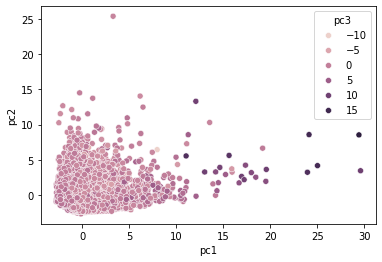

In [7]:
pca = PCA(n_components=3)
pcs = pca.fit_transform(scale_data)
pcs = pd.DataFrame(pcs, columns=['pc1', 'pc2', 'pc3'])
pcs.index = data.index

sns.scatterplot(data=pcs, x='pc1', y='pc2', hue='pc3')

<Axes: xlabel='pc2', ylabel='pc3'>

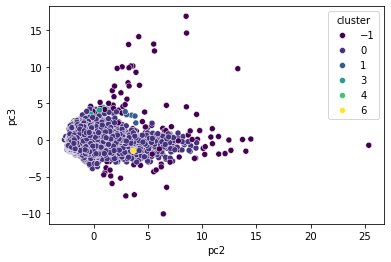

In [8]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1, min_samples=4)
pcs['cluster'] = dbscan.fit_predict(pcs[['pc1', 'pc2', 'pc3']])

sns.scatterplot(data=pcs, x='pc2', y='pc3', hue='cluster', palette='viridis')

<Axes: xlabel='pc1', ylabel='pc2'>

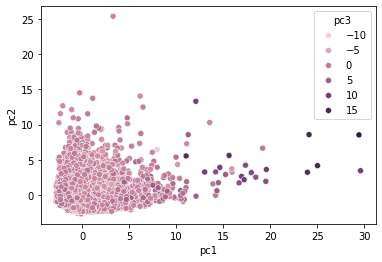

In [9]:
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns

pca = PCA(n_components=4)
pcs = pca.fit_transform(scale_data)
pcs = pd.DataFrame(pcs, columns=['pc1', 'pc2', 'pc3', 'pc4'])
pcs.index = data.index

sns.scatterplot(data=pcs, x='pc1', y='pc2', hue='pc3')

<Axes: xlabel='pc1', ylabel='pc2'>

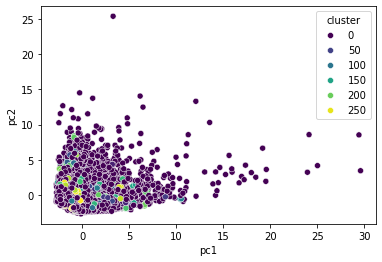

In [10]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.4, min_samples=2)

dbscan.fit(pcs)

pcs['cluster'] = dbscan.labels_

sns.scatterplot(data=pcs, x='pc1', y='pc2', hue='cluster', palette='viridis')